In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [7]:
data=pd.read_excel('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\Forecasting\\Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [8]:
from datetime import datetime,time
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
indexedDataset=data.set_index(['Month'])

In [9]:
indexedDataset.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


Text(0, 0.5, 'Number of air passengers')

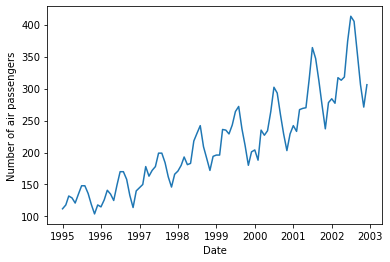

In [10]:
plt.plot(indexedDataset)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

# Determining the rolling statistics

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing      # SES
from statsmodels.tsa.holtwinters import Holt                    # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [12]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


# Plotting

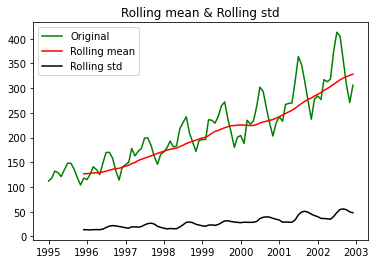

In [24]:
original=plt.plot(indexedDataset,color='green',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & Rolling std')
plt.show(block=False)

# Dickey-fuller test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
print('Results of Dickey-fuller test:')
dftest=adfuller(indexedDataset['Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-fuller test:
Test Statistic                  1.340248
p-value                         0.996825
Lags Used                      12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


# Estimating trend

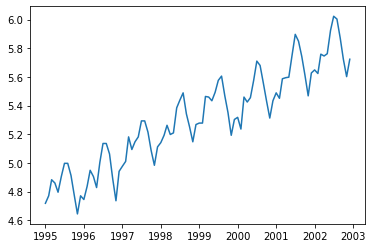

In [27]:
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

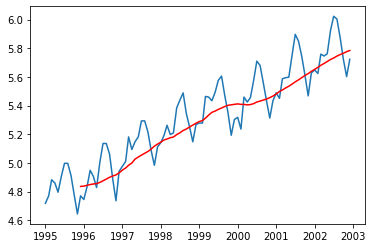

In [28]:
movingaverage=indexedDataset_logscale.rolling(window=12).mean()
movingstd=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage, color='red')

In [29]:
datasetlogminusmovingaverage=indexedDataset_logscale-movingaverage
datasetlogminusmovingaverage.head()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN


# Removing NaN values

In [30]:
datasetlogminusmovingaverage.dropna(inplace=True)

In [31]:
datasetlogminusmovingaverage.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


# Exponential decay weighted average

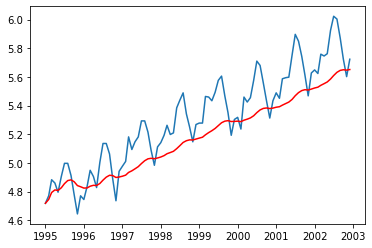

In [32]:
exponentialDecayWeightedAverage =indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In [33]:
datasetLogscaleminusExponentdecayaverage=indexedDataset_logscale-exponentialDecayWeightedAverage

In [34]:
datasetLogdiffshifting=indexedDataset_logscale-indexedDataset_logscale.shift()

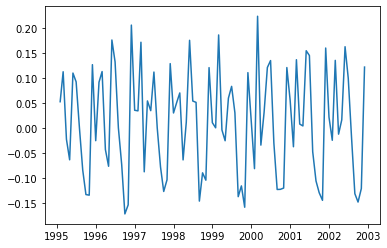

In [35]:
plt.plot(datasetLogdiffshifting)

In [36]:
datasetLogdiffshifting.head()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990
1995-05-01,-0.064022


In [37]:
datasetLogdiffshifting.dropna(inplace=True)
datasetLogdiffshifting.head()

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990
1995-05-01,-0.064022
1995-06-01,0.109484


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

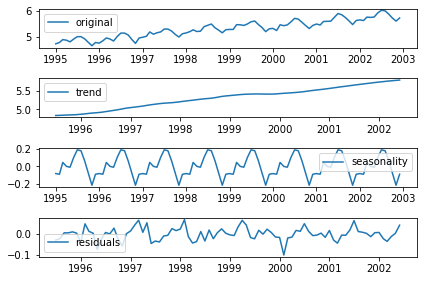

In [39]:
decomposition= seasonal_decompose(indexedDataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

In [40]:
decompositionlogdata=residual
decompositionlogdata.dropna(inplace=True)

# ACF and PACF plots:

In [41]:
from statsmodels.tsa.stattools import acf,pacf

In [43]:
lag_acf = acf(datasetLogdiffshifting,nlags=20)
lag_pacf = pacf(datasetLogdiffshifting,nlags=20,method='ols')


C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# ACF

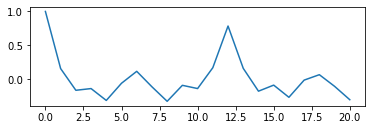

In [83]:
plt.subplot(211)
plt.plot(lag_acf)
plt.show()

# PACF

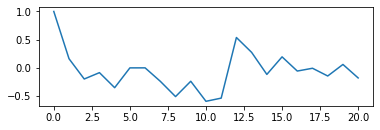

In [85]:
plt.subplot(211)
plt.plot(lag_pacf)
plt.show()

# AR MODEL

In [57]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

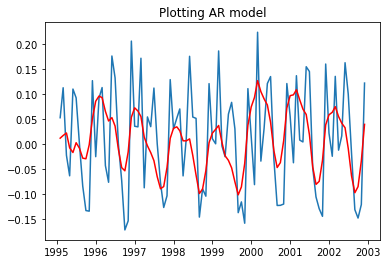

In [73]:
model= ARIMA(indexedDataset_logscale,order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('Plotting AR model')
plt.show()

In [65]:
predictions_ARIMA_diff=pd.Series(results_AR.fittedvalues,copy=True)

# Converting to cummulative sum

In [66]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [68]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['Passengers'].iloc[0], index =indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

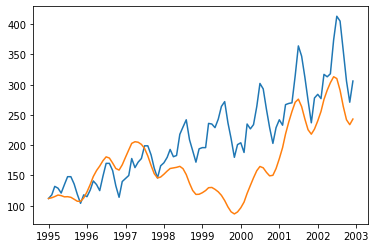

In [69]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

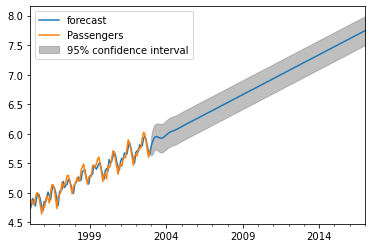

In [70]:
results_AR.plot_predict(1,264)
x=results_AR.forecast(steps=120)

In [71]:
x[1]

array([0.08322527, 0.10432675, 0.10878308, 0.10878654, 0.11128926,
       0.11615047, 0.12023552, 0.12203477, 0.12227908, 0.12234158,
       0.12285546, 0.12358351, 0.12409469, 0.12426973, 0.12427776,
       0.12430725, 0.12440456, 0.12451082, 0.12457094, 0.12458497,
       0.12458501, 0.12459402, 0.12461173, 0.12462715, 0.12463417,
       0.12463518, 0.12463538, 0.12463718, 0.12463977, 0.12464156,
       0.12464213, 0.12464214, 0.1246423 , 0.12464276, 0.12464325,
       0.12464354, 0.12464363, 0.12464363, 0.12464364, 0.12464369,
       0.12464372, 0.12464373, 0.12464373, 0.12464374, 0.12464376,
       0.12464378, 0.1246438 , 0.12464382, 0.12464382, 0.12464382,
       0.12464382, 0.12464382, 0.12464382, 0.12464382, 0.12464383,
       0.12464383, 0.12464384, 0.12464384, 0.12464385, 0.12464385,
       0.12464385, 0.12464386, 0.12464386, 0.12464386, 0.12464387,
       0.12464387, 0.12464387, 0.12464388, 0.12464388, 0.12464388,
       0.12464389, 0.12464389, 0.12464389, 0.12464389, 0.12464

In [72]:
len(x[1])

120